Target 1
透過開發者工具觀察網站屬於動態網站，因為下滑滑鼠或按 scroll bar 向下捲頁時，requests 的數量不停增加，由此可知此網頁屬於動態網站。

Target 2
根據網站特性選擇 requests / BeautifulSoup / selenium

In [1]:
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
Cupoy_url = "https://www.cupoy.com/newsfeed/topicgrp/business_tw"  #新聞
#使用webdriver.Chrime()建立Google Chrime瀏覽器物件
browser = webdriver.Chrome()
#以get()方法連結到指定網址
browser.get(Cupoy_url)  # 打開瀏覽器並連到Cupoy網頁

SCROLL_PAUSE_TIME = 1

# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#通過左邊控制橫向和縱向滾動條scrollTo(x, y）
last_height = browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
while True:
    time.sleep(1) #是Python程序暫停執行3秒
    # Calculate new scroll height and compare with last scroll height
    new_height = browser.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        print('到達網頁頁面底端')
        break
    print('網頁正在更新中...，請稍後')
    last_height = new_height
#
# 以下是用Selenium模擬下拉網頁動作，讓網頁更新
#
count = 1
total_count = 500
#建立空的串列(list)
updatetimelist = []
categorylist = []
livenesslist = []
titlelist = []
contentlist = []
hreflist = []
while (count <= total_count) :
    html_source = browser.page_source # browser.page_source:網頁原始碼
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM emMJDZ"):
        # 文章種類
        category = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        # 文章標題
        title = artical.find('h6', class_ = 'sc-erNlkL sc-ekulBa gyyrZF').text
        # 文章網址
        href = artical.find("a").get('href')
        # 文章更新時間
        updatetime = artical.find('span').text
        # 防止抓取到重複的文章
        if title not in titlelist:
            # 將各種資料存放進串列中(list)
            updatetimelist.append(updatetime)
            categorylist.append(category)
            titlelist.append(title)
            hreflist.append(href)
            # 計算目前總共已經爬取的文章數量
            count += 1
        # 抓取500篇文章就跳出迴圈
        if count == (total_count + 1):
            break
    
    # 將網頁繼續向下滑
    time.sleep(1) #暫停執行3秒
    browser.execute_script("window.scrollTo(0, 1000000);") # browser.execute_script():滾動到網頁底部
    # 關閉瀏覽器
browser.quit();

網頁正在更新中...，請稍後
到達網頁頁面底端


In [5]:
# 整理資料後顯示
from pandas import DataFrame
columnName = ['category','title','updatetime','href']

data = DataFrame([categorylist, titlelist, updatetimelist, hreflist])
data = data.T
data.columns = columnName
data


,category,title,updatetime,href
0,職涯,如何打造個人品牌？有實力也要多曝光！5 步驟教你怎麼做 | 經理人,4 小時前,https://www.managertoday.com.tw/articles/view/...
1,國際,OMDIA：美制裁華為可能改變面板市場生態 | TechNews 科技新報,4 小時前,https://technews.tw/2020/07/14/omdia-us-sancti...
2,理財,搶佔自駕車及5G市場，美國半導體業者Analog Devices收購對手Maxim Inte...,5 小時前,https://www.ithome.com.tw/news/138818
3,職涯,軟銀有意出售Arm或重新推動Arm上市 | iThome,5 小時前,https://www.ithome.com.tw/news/138817
4,趨勢與策略,HPE以9.25億美元買下SD-WAN業者Silver Peak | iThome,5 小時前,https://www.ithome.com.tw/news/138816
...,...,...,...,...
495,財經,銀行家觀點》五張圖帶你看懂全球抗疫的第二戰場-風傳媒,2020/06/28,https://www.storm.mg/article/2768868
496,財經,我們應該擔心產業空洞化嗎？：《資本主義沒有告訴你的23件事》選摘（2）-風傳媒,2020/06/28,https://www.storm.mg/article/2729535
497,理財,金融海嘯經驗顯示：大波動年代首選高股息低波動股票-風傳媒,2020/06/27,https://www.storm.mg/article/2801514
498,理財,斷捨離！五種我不再購入的商品，少買這些超省錢,2020/06/27,http://yt1.piee.pw/PST4X


TARGET 3
整理理成 pandas.DataFrame 後做簡單的統計可以⽤用 matplotlib.pyplot 或是pandas 內建的 function 畫圖 (histogram / pie chart ...)

In [12]:
import pandas as pd
# 重組分類
category_list = ', '.join(data['category'].values.tolist()).split(', ')
# 計算
df_cat = pd.Series([category for category in category_list]).value_counts().sort_index().rename_axis('分類').reset_index(name='次數')
df_cat


,分類,次數
0,3C產品,1
1,APP應用程式,2
2,Fintech金融科技,4
3,Google專區,6
4,兩岸,13
5,共享經濟,1
6,創業,4
7,區塊鏈技術,3
8,國際,26
9,房地產,8


In [13]:
df_cat = pd.Series([category for category in category_list]).value_counts(normalize=True).sort_index().rename_axis('分類').reset_index(name='佔比')
df_cat = df_cat.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df_cat

,分類,佔比
0,理財,0.316
1,財經,0.260
2,職涯,0.184
3,國際,0.052
4,電子商務,0.034
5,兩岸,0.026
6,行銷,0.022
7,房地產,0.016
8,趨勢與策略,0.014
9,Google專區,0.012


In [14]:
#合併低於3%的分類
df_cat_upper = df_cat[df_cat['佔比'] * 100 > 3].append({'分類':'其他', '佔比':df_cat[df_cat['佔比'] * 100 <= 3]['佔比'].values.sum()}, ignore_index=True)
df_cat_upper = df_cat_upper.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df_cat_upper

,分類,佔比
0,理財,0.316
1,財經,0.260
2,職涯,0.184
3,其他,0.154
4,國際,0.052
5,電子商務,0.034


In [15]:
#低於3%的分類 - 其他，重新計算佔比
df_cat_lower = df_cat[df_cat['佔比'] * 100 <= 3].copy()
df_cat_lower.loc[:, '佔比'] = df_cat_lower['佔比'].div(df_cat_lower['佔比'].sum())
df_cat_lower = df_cat_lower.sort_values(by=['佔比'], ascending=False).reset_index(drop=True)
df_cat_lower

,分類,佔比
0,兩岸,0.168831
1,行銷,0.142857
2,房地產,0.103896
3,趨勢與策略,0.090909
4,Google專區,0.077922
5,Fintech金融科技,0.051948
6,創業,0.051948
7,網紅經濟與自媒體,0.038961
8,區塊鏈技術,0.038961
9,蘋果專區,0.038961


([<matplotlib.patches.Wedge at 0x23ee975f308>,
 [Text(0.6010337393145051, 0.9212808715075028, '理財'),
  Text(-1.0372896119677928, 0.3661014352658371, '財經'),
  Text(-0.5420000445154542, -0.9572021477959844, '職涯'),
  Text(0.5717991060926542, -0.9397051570953742, '其他'),
  Text(1.0227541473674753, -0.4049369753957138, '國際'),
  Text(1.09373087424586, -0.1172722248505022, '電子商務')],
 [Text(0.3278365850806391, 0.5025168390040924, '31.6%'),
  Text(-0.5657943338006142, 0.19969169196318384, '26.0%'),
  Text(-0.2956363879175205, -0.5221102624341732, '18.4%'),
  Text(0.31189042150508406, -0.5125664493247495, '15.4%'),
  Text(0.5578658985640773, -0.22087471385220753, '5.2%'),
  Text(0.5965804768613782, -0.06396666810027392, '3.4%')])

C:\Users\IVAN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20854 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\IVAN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\IVAN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20854 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\IVAN\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0, flags=flags)


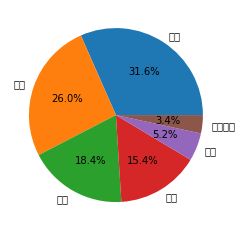

In [35]:
plt.pie( df_cat_upper['佔比'] ,
    labels = df_cat_upper['分類'],
    autopct='%1.1f%%',
    ) 